# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [82]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [83]:

iris_data = load_iris()


In [87]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [89]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    # Panda df
    df = pd.DataFrame(iris_data['data'], columns= iris_data['feature_names'])

    # clean column names
    df.columns = df.columns.str.strip('\(cm\) ')
     # add target
    df['target'] = iris_data['target']

    # add column class containing actual target names
    df['class'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2:'virginica'})
    return df
    
df_iris = create_df()

df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
58,6.6,2.9,4.6,1.3,1,versicolor
69,5.6,2.5,3.9,1.1,1,versicolor
140,6.7,3.1,5.6,2.4,2,virginica
10,5.4,3.7,1.5,0.2,0,setosa
95,5.7,3.0,4.2,1.2,1,versicolor
14,5.8,4.0,1.2,0.2,0,setosa
55,5.7,2.8,4.5,1.3,1,versicolor
11,4.8,3.4,1.6,0.2,0,setosa
133,6.3,2.8,5.1,1.5,2,virginica
131,7.9,3.8,6.4,2.0,2,virginica


In [90]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [94]:

#From our data we will only get variable columns as np.array
x = df_iris.drop(['target', 'class'], axis= 1).values
x.shape

(150, 4)

In [95]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [98]:
mergings = linkage(x, method='complete')

In [99]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

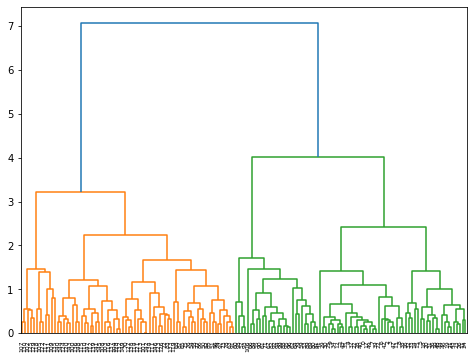

In [107]:
plt.figure(figsize=(8, 6))
dn = dendrogram(mergings,  leaf_rotation = 90, leaf_font_size=6)

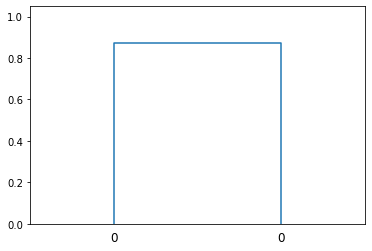

In [103]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [2]:
from sklearn.cluster import KMeans

df = pd.read_csv('01. Partitional Algorithms/datasets/ch1ex1.csv')
points = df.values

new_df = pd.read_csv('01. Partitional Algorithms/datasets/ch1ex2.csv')
new_points = new_df.values


In [6]:
# inspection
print(points.shape)
df.head()


(300, 2)


,0,1
0,0.065446,-0.768664
1,-1.529015,-0.429531
2,1.709934,0.698853
3,1.167791,1.012626
4,-1.801101,-0.318613


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [7]:
model = KMeans(3)

In [8]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [9]:
model.fit(points)

KMeans(n_clusters=3)

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [10]:
labels = model.predict(points)

In [13]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [20]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []

    for lab, pt in zip(labels, points):
        if lab == 0:
            data_0.append(pt)

        elif lab == 1:
            data_1.append(pt)

        else:
            data_2.append(pt)
        
    return np.array(data_0), np.array(data_1), np.array(data_2)


data_0,data_1,data_2 = separate_labels(labels, points)

print(data_0.shape)
print(data_1.shape)
print(data_2.shape)

(94, 2)
(111, 2)
(95, 2)


In [29]:
pd.Series(labels).value_counts().sort_index().index

Int64Index([0, 1, 2], dtype='int64')

In [23]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

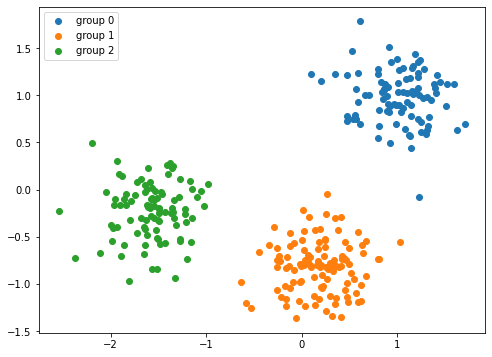

In [38]:
# plotting the data 
label = pd.Series(labels).value_counts().sort_index().index
data = [data_0, data_1, data_2]

plt.figure(figsize=(8, 6))

for lab, dt in zip(label, data):
    plt.scatter(dt[:, 0], dt[:, 1], label = f'group {lab}')

plt.legend()



**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [39]:
new_labels =  model.predict(new_points)


In [40]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [44]:
#separate the data by labels like we did before

new_0, new_1, new_2 = separate_labels(new_labels, new_points)

In [45]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

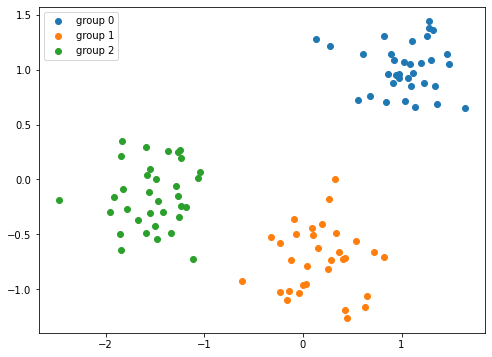

In [46]:
#plot the new labels
label = pd.Series(new_labels).value_counts().sort_index().index
data = [new_0, new_1, new_2]

plt.figure(figsize=(8, 6))

for lab, dt in zip(label, data):
    plt.scatter(dt[:, 0], dt[:, 1], label = f'group {lab}')

plt.legend()



In [57]:
#plot all the points together

df[['label', 'point_type']] = labels, 'training_data'
new_df[['label', 'point_type']] = new_labels, 'new_data'

all_points = pd.concat([df, new_df])


C:\Users\ADMIN\anaconda3\envs\strive\lib\site-packages\numpy\core\fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


In [63]:
all_points.columns

Index(['0', '1', 'label', 'point_type'], dtype='object')

<AxesSubplot:xlabel='0', ylabel='1'>

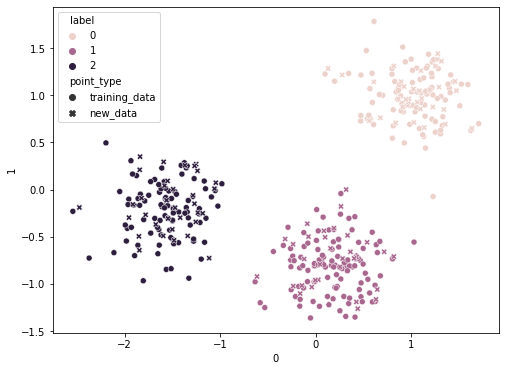

In [81]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x = all_points['0'], y = all_points['1'], hue = all_points['label'], style = all_points['point_type'])